<a href="https://colab.research.google.com/github/MichaelV-07/03MAIR-Algoritmos-de-optimizacion/blob/main/Trabajo_Pr%C3%A1ctico_Algoritmos_MICHAEL_VALLEJO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Trabajo Práctico<br>
Nombre y Apellidos: MICHAEL VALLEJO  <br>
Url: https://github.com/MichaelV-07/03MAIR-Algoritmos-de-optimizacion<br>
Google Colab: https://colab.research.google.com/drive/1xKi0mlKSOFKYcLBzDWopclLva2VD0AuH?usp=sharing <br>
Problema:
>1. Sesiones de doblaje <br>
>2. Organizar los horarios de partidos de una jornada de La Liga<br>
>3. Configuración de Tribunales

Descripción del problema:

##Problema 1. Organizar sesiones de doblaje(I)
Se precisa coordinar el doblaje de una película. Los actores del doblaje deben coincidir en las
tomas en las que sus personajes aparecen juntos en las diferentes tomas. Los actores de
doblaje cobran todos la misma cantidad por cada día que deben desplazarse hasta el estudio de
grabación independientemente del número de tomas que se graben. No es posible grabar más
de 6 tomas por día. El objetivo es planificar las sesiones por día de manera que el gasto por los
servicios de los actores de doblaje sea el menor posible. Los datos son:

Número de actores: 10

Número de tomas : 30

Actores/Tomas : https://bit.ly/36D8IuK
- 1 indica que el actor participa en la toma
- 0 en caso contrario







                                        

#Modelo
- ¿Como represento el espacio de soluciones?
- ¿Cual es la función objetivo?
- ¿Como implemento las restricciones?

## ¿Cómo represento el espacio de soluciones?

El espacio de soluciones se representa mediante un conjunto de asignaciones de tomas a días de grabación, cumpliendo con las restricciones del problema.

Sea $ X $ una matriz binaria de dimensión $ (30 \times D) $, donde:

- $ X_{ij} = 1 $ si la toma $ i $ está asignada al día $ j $.
- $ X_{ij} = 0 $ en caso contrario.
- $ D $ es el número de días necesarios para completar la grabación.

Cada solución posible corresponde a una asignación válida de tomas a días, respetando el máximo de 6 tomas por día y garantizando que los actores estén presentes en sus respectivas sesiones.



## ¿Cuál es la función objetivo?

La funcion objetivo se define como:


$$ min \sum_{j=1}^{D} Y_j$$


### Donde:

- $ Y_j $ es una variable binaria que indica si el día $ j $ se usa para grabación.
- Si al menos una toma está programada en el día $ j $, entonces $ Y_j = 1 $, de lo contrario, $ Y_j = 0 $.

## ¿Cómo implemento las restricciones?

### - Cada toma debe asignarse exactamente a un día:
- Se garantiza que cada toma $ i $ pertenezca a un único día $ j $:


$$\sum_{j=1}^{D} X_{ij} = 1, \quad \forall i \in \{1, ..., 30\}$$



### - Cada día no debe tener más de 6 tomas:
- Se asegura que cada día $ j $ no tenga más de 6 tomas:

$$ \sum_{i=1}^{30} X_{ij} \leq 6, \quad \forall j \in \{1, ..., D\}$$


### - Si un actor tiene una toma en un día, debe ser convocado:
- Se garantiza que un actor $ a_k $ es convocado si aparece en alguna toma del día $ j $:


$$ Y_j \geq X_{ij} \cdot A_{ik}, \quad \forall i, j, k$$


Donde $ A_{ik} $ es una matriz binaria que indica si el actor $ k $ participa en la toma $ i $.





#Análisis
### ¿Que complejidad tiene el problema?. Orden de complejidad y Contabilizar el espacio de soluciones

- El problema es NP-completo, ya que requiere evaluar muchas convianaciones posibles de asignacion de tomas y actores.

- Búsqueda Exhaustiva: Tiene una complejidad de $O(6^{30})$, lo cual es impráctico.

- Algoritmo de Clustering: Reduce la complejidad a $O(n \log n)$ utilizando técnicas de agrupamiento.

-

#Diseño
### ¿Que técnica utilizo? ¿Por qué?

Técnica: Algoritmo clustering jerárquico con restricción de tamaño máximo para agrupar tomas y minimizar el número de días trabajados.

Se usa método de Ward para minimizar la varianza entre tomas dentro de cada grupo.


In [17]:
#Respuesta
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
df = df.select_dtypes(include=[np.number])

num_tomas = len(df)
num_dias = (num_tomas // 6) + 1
df = df.fillna(0).astype(int)

# Se aplicaa clustering
clusters = fcluster(linkage(df.values, method='ward'), t=num_dias, criterion='maxclust')

# Se asigna tomas a días según los clusters
asignacion = {i: [] for i in range(1, num_dias+1)}
for toma, cluster in enumerate(clusters):
    if len(asignacion[cluster]) < 6:
        asignacion[cluster].append(toma + 1)
    else:
        for nuevo_dia in range(1, num_dias+1):
            if len(asignacion[nuevo_dia]) < 6:
                asignacion[nuevo_dia].append(toma + 1)
                break

# Mostrar la asignación de sesiones
for dia, tomas in asignacion.items():
    print(f"Día {dia}: Tomas {tomas}")

Saving Datos problema doblaje(30 tomas, 10 actores) - Hoja 1.csv to Datos problema doblaje(30 tomas, 10 actores) - Hoja 1 (11).csv
Día 1: Tomas [9, 11, 12, 15, 18, 19]
Día 2: Tomas [2, 3, 7, 8, 14, 20]
Día 3: Tomas [4, 5, 16, 21, 24, 25]
Día 4: Tomas [6, 10, 13, 17, 22, 23]
Día 5: Tomas [1, 26, 27, 28, 29, 30]
Día 6: Tomas [31, 32, 33]


##Problema 2. Organizar los horarios de partidos de La Liga(I)
Desde la La Liga de fútbol profesional se pretende organizar los horarios de los partidos de liga de cada jornada. Se conocen algunos datos que nos deben llevar a diseñar un algoritmo que realice la asignación de los partidos a los horarios de forma que maximice la
audiencia.

• Los horarios disponibles se conocen a priori y son los siguientes:

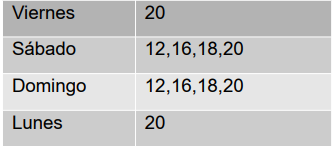


- En primer lugar se clasifican los equipos en tres categorías según el numero de seguidores( que tiene relación directa con la audiencia). Hay 3 equipos en la categoría A, 11 equipos de categoría B y 6 equipos de categoría C.
- Se conoce estadísticamente la audiencia que genera cada partido según los equipos que se enfrentan y en horario de sábado a las 20h (el mejor en todos los casos)

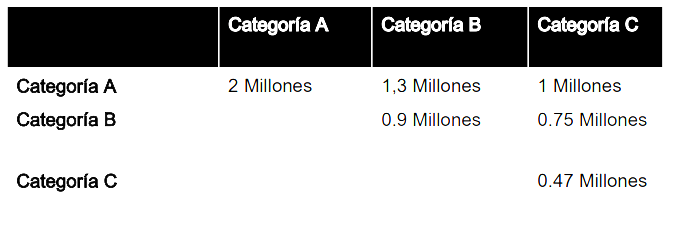


- Si el horario del partido no se realiza a las 20 horas del sábado se sabe que se reduce según los coeficientes de la siguiente tabla
- Debemos asignar obligatoriamente siempre un partido el viernes y un partido el lunes.

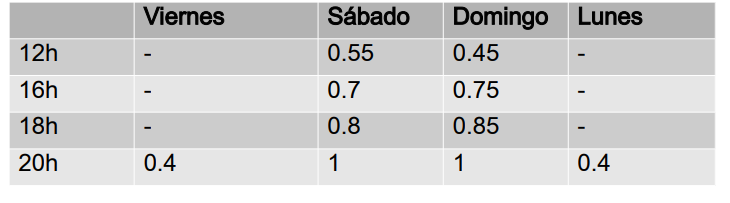

-Es posible la coincidencia de horarios pero en este caso la audiencia de cada partido se verá afectada y se estima que se reduce en porcentaje según la
siguiente tabla dependiendo del número de coincidencias:

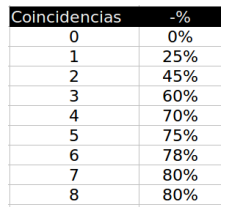

- Los cálculos asociados a una jornada de ejemplo se realizan según se muestra en la siguiente tabla:

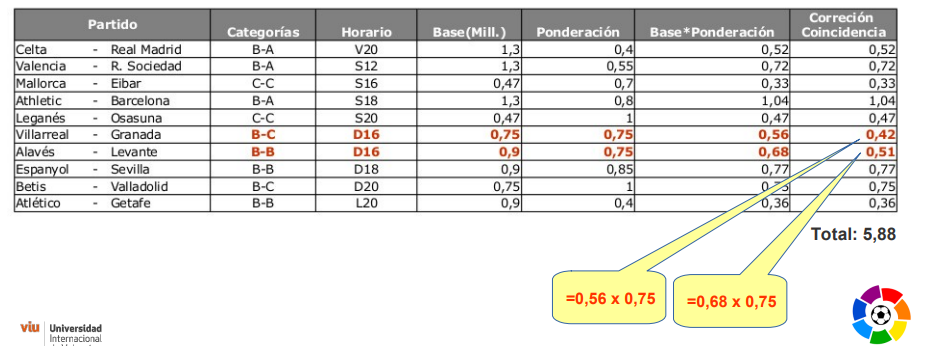

#Modelo
##¿Como represento el espacio de soluciones?

Cada solución se modela como un **vector de asignaciones**:


$${Solución} = (h_1, h_2, ..., h_n)$$


Donde $h_i$ es el horario asignado al partido $i$.

##¿Cual es la función objetivo?

$$ \max \sum_{i=1}^{n} A_i \times H(h_i) \times P(c) $$

Donde:

- $ A_i $ = audiencia base según la categoría del partido.
- $ H(h_i) $ = coeficiente de horario según la tabla dada.
- $ P(c) $ = penalización por coincidencias.

##¿Como implemento las restricciones?

- Horarios disponibles: Se seleccionan solo los proporcionados en la tabla.
- Un partido obligatorio el viernes y otro el lunes.
- Si hay coincidencias en un horario, se aplica un porcentaje de reducción de audiencia.



#Análisis
##¿Que complejidad tiene el problema?. Orden de complejidad y Contabilizar el espacio de soluciones

¿Qué complejidad tiene el problema?
El problema pertenece a la categoría de Optimización Combinatoria y tiene una complejidad exponencial:

$$𝑂(ℎ^𝑛)$$

Siendo h los horarios disponibles y n el número de partidos.

Con $10$ partidos y $10$ horarios → $10^{10}$ ($10$ mil millones de combinaciones).



#Diseño
##¿Que técnica utilizo? ¿Por qué?

La tecnica utilizada es Recocido Simulado

- Explora el espacio de búsqueda de manera eficiente sin evaluar todas las soluciones.
- Evita mínimos locales mediante un enfriamiento progresivo.
- Flexibilidad para aceptar soluciones subóptimas en las primeras iteraciones, mejorando el resultado final.

In [ ]:
#Respuesta
import random
import numpy as np
import pandas as pd

# Datos del problema
partidos = [
    ("Celta - Real Madrid", "B-A", 1.3),
    ("Valencia - R. Sociedad", "B-A", 1.3),
    ("Mallorca - Eibar", "C-C", 0.47),
    ("Athletic - Barcelona", "A-A", 2.0),
    ("Leganés - Osasuna", "C-C", 0.47),
    ("Villarreal - Granada", "B-C", 0.75),
    ("Alavés - Levante", "B-C", 0.75),
    ("Espanyol - Sevilla", "B-B", 0.9),
    ("Betis - Valladolid", "B-B", 0.9),
    ("Atlético - Getafe", "B-B", 0.9),
]

horarios = {
    "V20": 0.4, "S12": 0.55, "S16": 0.7, "S18": 0.8, "S20": 1.0,
    "D12": 0.45, "D16": 0.75, "D18": 0.85, "D20": 1.0, "L20": 0.4
}

penalizaciones = {0: 1.0, 1: 0.75, 2: 0.55, 3: 0.4, 4: 0.3, 5: 0.25, 6: 0.22, 7: 0.2, 8: 0.2}

# Parámetros de Recocido Simulado
T_init = 1000  # Temperatura inicial
T_min = 1  # Temperatura mínima
alpha = 0.99  # Factor de enfriamiento
iterations = 1000  # Iteraciones por temperatura

# Se genera una solución inicial aleatoria con restricciones
def generar_solucion_inicial():
    solucion = ["V20"]  # Partido obligatorio el viernes
    horarios_disponibles = list(horarios.keys())
    horarios_disponibles.remove("V20")
    horarios_disponibles.remove("L20")
    random.shuffle(horarios_disponibles)

    for i in range(1, len(partidos) - 1):
        solucion.append(random.choice(horarios_disponibles))

    solucion.append("L20")  # Partido obligatorio el lunes
    return solucion

# Se evalua la audiencia total de una solución
def evaluar_solucion(solucion):
    audiencia_total = 0
    concurrencias = {h: 0 for h in horarios}

    for (partido, categoria, base_audiencia), horario in zip(partidos, solucion):
        concurrencias[horario] += 1
        factor_horario = horarios[horario]
        penalizacion = penalizaciones[min(concurrencias[horario] - 1, 8)]  # coincidencia

        audiencia_partido = base_audiencia * factor_horario * penalizacion
        audiencia_total += audiencia_partido

    return audiencia_total

# Se Genera una solución vecina respetando restricciones
def generar_vecino(solucion):
    vecino = solucion[:]
    i = random.randint(1, len(solucion) - 2)  # Evita cambiar el viernes y lunes
    horarios_disponibles = list(horarios.keys())
    horarios_disponibles.remove("V20")
    horarios_disponibles.remove("L20")
    vecino[i] = random.choice(horarios_disponibles)
    return vecino

# Algoritmo Recocido Simulado para optimizar la asignación de horarios
def simulated_annealing():
    solucion_actual = generar_solucion_inicial()
    mejor_solucion = solucion_actual[:]
    mejor_valor = evaluar_solucion(mejor_solucion)

    T = T_init

    while T > T_min:
        for _ in range(iterations):
            vecino = generar_vecino(solucion_actual)
            valor_actual = evaluar_solucion(solucion_actual)
            valor_vecino = evaluar_solucion(vecino)

            if valor_vecino > valor_actual:
                solucion_actual = vecino
            else:
                probabilidad = np.exp((valor_vecino - valor_actual) / T)
                if random.random() < probabilidad:
                    solucion_actual = vecino

            if evaluar_solucion(solucion_actual) > mejor_valor:
                mejor_solucion = solucion_actual[:]
                mejor_valor = evaluar_solucion(mejor_solucion)

        T *= alpha

    return mejor_solucion, mejor_valor


mejor_asignacion, mejor_audiencia = simulated_annealing()

df_resultado = pd.DataFrame({
    "Partido": [p[0] for p in partidos],
    "Categoría": [p[1] for p in partidos],
    "Horario": mejor_asignacion,
    "Audiencia Base (Mill.)": [p[2] for p in partidos],
    "Factor Horario": [horarios[h] for h in mejor_asignacion],
    "Penalización Coincidencia": [penalizaciones[min(mejor_asignacion.count(h) - 1, 8)] for h in mejor_asignacion],
    "Audiencia Final (Mill.)": [
        p[2] * horarios[h] * penalizaciones[min(mejor_asignacion.count(h) - 1, 8)]
        for p, h in zip(partidos, mejor_asignacion)
    ]
})


df_resultado.to_csv("horarios_optimizados.csv", index=False)
print(df_resultado.to_string())



                  Partido Categoría Horario  Audiencia Base (Mill.)  Factor Horario  Penalización Coincidencia  Audiencia Final (Mill.)
0     Celta - Real Madrid       B-A     V20                    1.30            0.40                       1.00                   0.5200
1  Valencia - R. Sociedad       B-A     D20                    1.30            1.00                       0.75                   0.9750
2        Mallorca - Eibar       C-C     S16                    0.47            0.70                       1.00                   0.3290
3    Athletic - Barcelona       A-A     S20                    2.00            1.00                       0.75                   1.5000
4       Leganés - Osasuna       C-C     D16                    0.47            0.75                       1.00                   0.3525
5    Villarreal - Granada       B-C     S20                    0.75            1.00                       0.75                   0.5625
6        Alavés - Levante       B-C     D20     

# Problema 3. Generación de Tribunales
- Se precisa configurar tribunales de evaluación para un grupo de 15 alumnos que desean presentar su Trabajo Fin de Máster (TFM).
- Cada tribunal está compuesto por tres profesores, cada uno desempeñando uno de los siguientes roles: Presidente, Secretario o Vocal.
- Los profesores han indicado su disponibilidad horaria para participar en los tribunales de 15h a 21h durante la semana del 15 al 19 de abril:

Número de profesores : 10

Número de tribunales : 15

Disponibilidad/Roles : https://bit.ly/41QWk8o

- 1 indica que profesor tiene disponibilidad
- 0 en caso contrario

Disponibilidad
- 1 indica que profesor tiene disponibilidad
- 0 en caso contrario

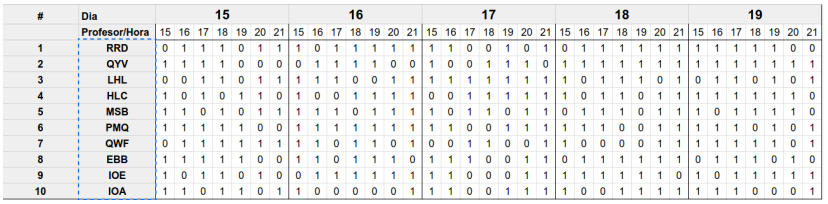

Roles

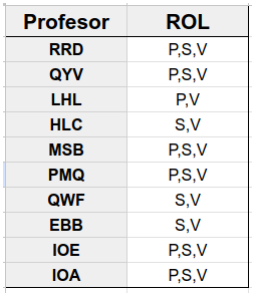

- Hay 15 alumnos, por lo que se deben configurar 15 tribunales buscando la configuración más equilibrada posible en cuanto a la cantidad de tribunales asignados a cada profesor, es decir, evitando que un profesor tenga muchos tribunales y otros pocos.
- Obviamente ningún profesor puede asistir a dos tribunales a la misma fecha/hora y no puede ser convocado a un tribunal al que no tiene disponibilidad.


#Modelo
##¿Como represento el espacio de soluciones?

El espacio de soluciones se representa como una matriz en la que las filas corresponden a los tribunales y las columnas a los profesores disponibles en diferentes franjas horarias. Cada celda de la matriz indica si un profesor ha sido asignado a un tribunal específico.

##¿Cual es la función objetivo?
$$ \min \sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2} $$

donde:

- $ x_i $ es el número de tribunales asignados al profesor $ i $,
- $ \bar{x} $ es el número promedio de tribunales asignados,
- $ n $ es el número total de profesores.


##¿Como implemento las restricciones?

- Cada tribunal debe contar con exactamente 3 profesores.

- Los profesores deben cumplir con los roles necesarios Presidente, Secretario y Vocal.

- Un profesor no puede ser asignado a dos tribunales a la misma fecha y hora.

- Solo se asignan profesores que tienen disponibilidad en la fecha y hora correspondientes.

#Análisis
## ¿Que complejidad tiene el problema?. Orden de complejidad y Contabilizar el espacio de soluciones

Problema de Asignación de Recursos con Restricciones, con una complejidad NP-difícil. La cantidad de combinaciones posibles es exponencial, dependiendo del número de profesores y tribunales. Lo que se representa como:

$ C = \prod_{t=1}^{T} \binom{P}{3} $

donde:

- $ C $ representa el **número total de configuraciones posibles**,
- $ T $ es el número total de tribunales (15),
- $ P $ es el número total de profesores disponibles (10),
- $ \binom{P}{3} $ es la cantidad de formas en que se pueden elegir 3 profesores de un conjunto de $ P $ disponibles.




#Diseño
## Que técnica utilizo? ¿Por qué?

Se utilizará un algoritmo de búsqueda local con heurísticas voraces combinado con un algoritmo genético para obtener una asignación equitativa. Esto se debe a que:

- La técnica voraz permite asignar profesores de manera eficiente según su disponibilidad y número de asignaciones previas.

- La búsqueda local optimiza la asignación ajustando iterativamente las combinaciones para minimizar la sobrecarga en algunos profesores.

- Los algoritmos genéticos pueden explorar múltiples combinaciones en paralelo, evitando quedar atrapados en óptimos locales y buscando una distribución más equitativa.



In [2]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.7 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import random
from deap import base, creator, tools, algorithms
from google.colab import files

display("Sube el archivo de datos")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]


def load_data(file_name):
    xls = pd.ExcelFile(file_name)
    df_disponibilidad = pd.read_excel(xls, sheet_name='disponibilidad', skiprows=1)
    df_roles = pd.read_excel(xls, sheet_name='roles')
    df_disponibilidad.columns = df_disponibilidad.columns.astype(str).str.strip()
    df_roles.columns = df_roles.columns.astype(str).str.strip()
    df_disponibilidad.dropna(subset=[df_disponibilidad.columns[0]], inplace=True)

    for col in df_disponibilidad.columns:
        if "Profesor" in col or "Hora" in col:
            df_disponibilidad.rename(columns={col: "Profesor"}, inplace=True)

    return df_disponibilidad, df_roles

# función objetivo
def fitness(individual, disponibilidad, roles):
    prof_indices = {prof: idx for idx, prof in enumerate(disponibilidad['Profesor'])}
    tribunal_count = np.zeros(len(disponibilidad))

    for profesor in individual:
        if profesor in prof_indices:
            tribunal_count[prof_indices[profesor]] += 1

    return (np.std(tribunal_count),)

def generate_individual(disponibilidad, num_tribunales):
    available_profs = list(disponibilidad['Profesor'])
    individual = [random.choice(available_profs) if available_profs else -1 for _ in range(num_tribunales * 3)]
    return individual

# Algoritmo genético
def genetic_algorithm(disponibilidad, roles, num_tribunales=15, num_generations=100, pop_size=50):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    toolbox.register("individual", tools.initIterate, creator.Individual,
                     lambda: generate_individual(disponibilidad, num_tribunales))
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", fitness, disponibilidad=disponibilidad, roles=roles)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=pop_size)
    algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=num_generations, verbose=False)

    best_individual = tools.selBest(pop, k=1)[0]
    return best_individual

disponibilidad, roles = load_data(file_name)
solution = genetic_algorithm(disponibilidad, roles)

def format_solution(solution, num_tribunales):
    fechas = [15, 16, 17, 18, 19]
    horas = [16, 17, 18, 19, 20, 21]

    tribunales = []
    for i in range(num_tribunales):
        fecha = fechas[i % len(fechas)]
        hora = horas[i % len(horas)]

        tribunales.append({
            "Tribunal": i + 1,
            "Fecha": fecha,
            "Hora": hora,
            "Presidente": solution[i * 3],
            "Secretario": solution[i * 3 + 1],
            "Vocal": solution[i * 3 + 2]
        })
    return pd.DataFrame(tribunales)

solution_df = format_solution(solution, 15)
print(solution_df.to_string())

'Sube el archivo de datos'

Saving Datos problema de Tribunales(Algoritmos de Optimización).xlsx to Datos problema de Tribunales(Algoritmos de Optimización).xlsx
    Tribunal  Fecha  Hora Presidente Secretario Vocal
0          1     15    16        RRD        IOA   EBB
1          2     16    17        QYV        RRD   RRD
2          3     17    18        LHL        QYV   LHL
3          4     18    19        QYV        PMQ   LHL
4          5     19    20        RRD        PMQ   QWF
5          6     15    21        PMQ        IOA   IOE
6          7     16    16        IOA        HLC   QYV
7          8     17    17        QWF        HLC   EBB
8          9     18    18        IOE        LHL   EBB
9         10     19    19        IOE        QWF   MSB
10        11     15    20        EBB        MSB   RRD
11        12     16    21        IOA        IOA   MSB
12        13     17    16        QWF        LHL   IOE
13        14     18    17        MSB        QYV   PMQ
14        15     19    18        HLC        HLC   EBB
